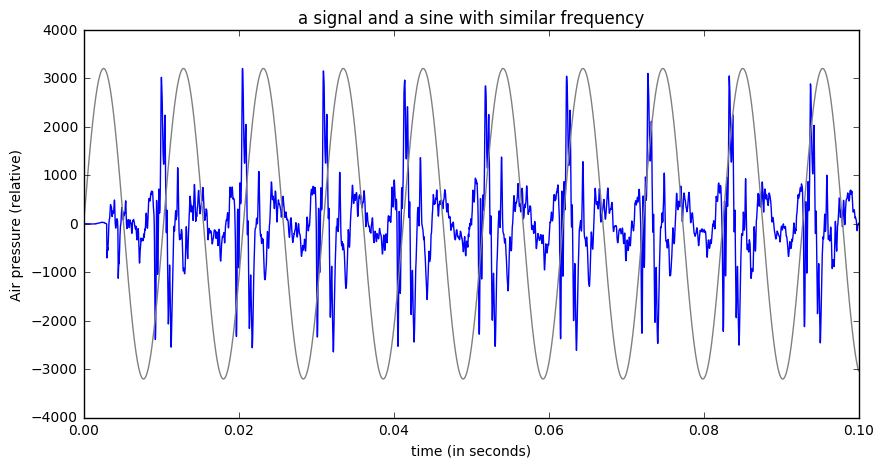

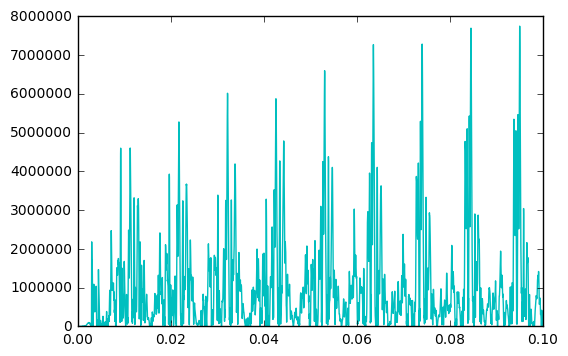

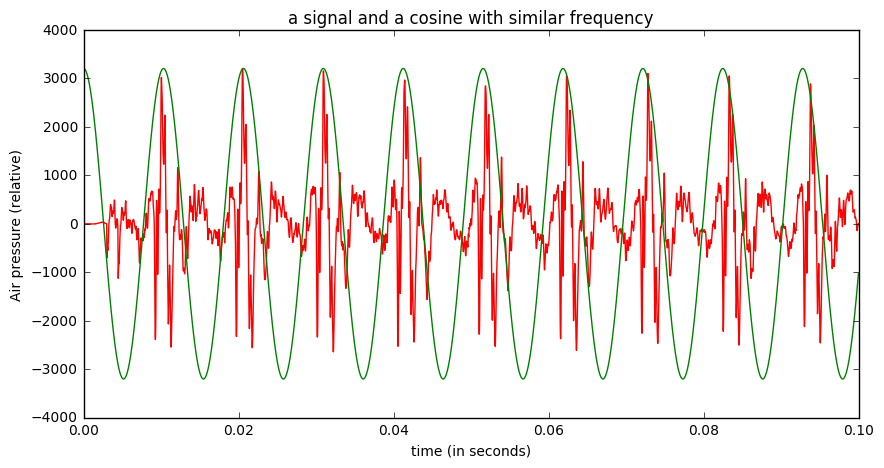

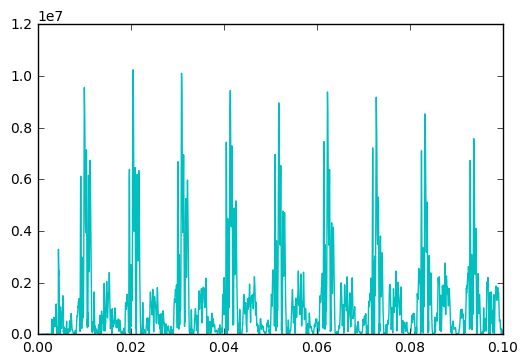

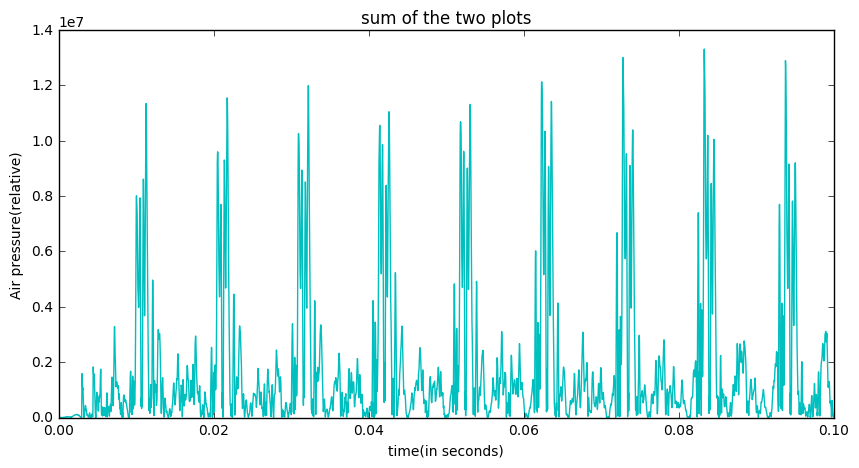

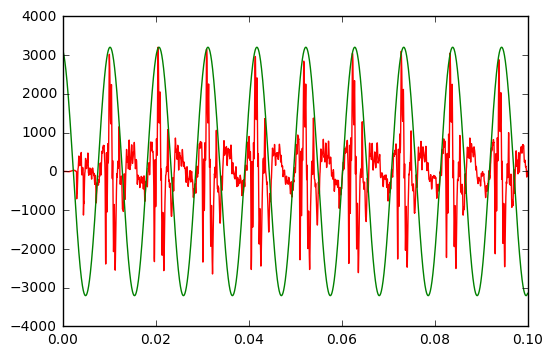

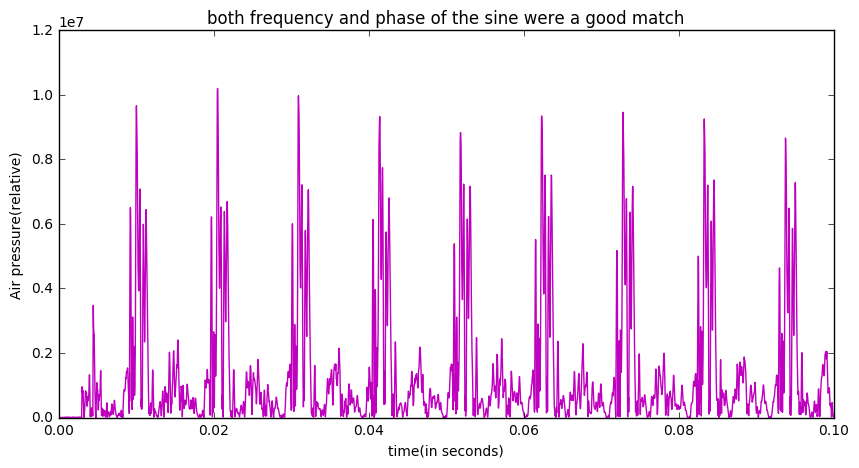

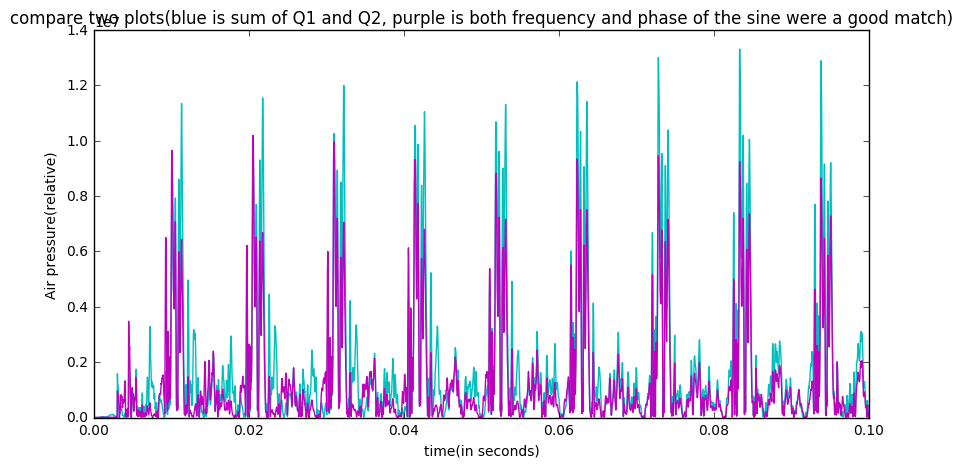

In [13]:
%matplotlib inline 

import numpy as np
import scipy
import scipy.spatial
from scipy.io import wavfile
import pylab
import matplotlib.pyplot as plt


# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

(sample_rate_eh, input_signal_eh) = wavfile.read("audio_files/vowel_eh.wav")

# Make a list of times, one for each sample. Assume sample rate is in Hz so times are in seconds.

time_array_eh = np.arange(0, len(input_signal_eh)/sample_rate_eh, 1/sample_rate_eh)

# To avoid too much calculation, let's use signal durations of only 1/10th second.

time_array_eh = time_array_eh[0:(sample_rate_eh//10)]

input_signal_eh = input_signal_eh[0:(sample_rate_eh//10)]

# linalg.norm functions don't seem to work with big arrays of integers so convert to floats

f_input_signal_eh = np.asfarray(input_signal_eh)

guessed_cycles = 9.7 # number of cycles in the 0.1 s period

guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq*(time_array_eh))
guessed_cos_signal = np.cos(guessed_ang_freq * (time_array_eh)) # Make a cosine wave

guessed_sin_signal = guessed_sin_signal*np.amax(f_input_signal_eh)
guessed_cos_signal = guessed_cos_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal
    
setup_graph(title='a signal and a sine with similar frequency', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(10,5))
plt.plot(time_array_eh, f_input_signal_eh,color='blue')
plt.plot(time_array_eh, guessed_sin_signal,color='grey')
plt.show()
           
signal_product_sin_different = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

plt.plot(time_array_eh, np.sqrt(signal_product_sin_different**2),color='c')
plt.show()

    
setup_graph(title='a signal and a cosine with similar frequency', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(10,5))
plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_cos_signal,color='g')
plt.show()

signal_product_cos_different = guessed_cos_signal * f_input_signal_eh # Pointwise product of the two signals

plt.plot(time_array_eh, np.sqrt(signal_product_cos_different**2),color='c')
plt.show()

#sum of the two plots
setup_graph(title = 'sum of the two plots', x_label = 'time(in seconds)', y_label = 'Air pressure(relative)', fig_size=(10,5))
sum_two_plots = signal_product_sin_different + signal_product_cos_different

plt.plot(time_array_eh, np.sqrt(sum_two_plots**2) ,color='c')
plt.show()

#Product of two signals with similar frequencies and phases
guessed_cycles = 9.5 # number of cycles in the 0.1 s period
guessed_phase = (1.25 * 2 * np.pi) / 0.1 # phase shift 


guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh + guessed_phase)) # Make a sine wave

guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_sin_signal,color='g')
plt.show()

signal_product_freq_phase_similar = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

#signal_product = signal_product/np.amax(f_input_signal_eh)

setup_graph(title = 'both frequency and phase of the sine were a good match', x_label = 'time(in seconds)', y_label = 'Air pressure(relative)', fig_size=(10,5))
plt.plot(time_array_eh, np.sqrt(signal_product_freq_phase_similar**2),color='m')
plt.show()

#compare two plots
setup_graph(title = 'compare two plots(blue is sum of Q1 and Q2, purple is both frequency and phase of the sine were a good match)', x_label = 'time(in seconds)', y_label = 'Air pressure(relative)', fig_size=(10,5))
plt.plot(time_array_eh, np.sqrt(sum_two_plots**2) ,color='c')
plt.plot(time_array_eh, np.sqrt(signal_product_freq_phase_similar**2),color='m')
plt.show()